In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.781422,0.663865,-2.204950e-08,0.749083,0.637037,-0.023198,0.731799,0.588864,-0.037562,0.752138,...,0.825913,0.559185,-0.057799,0.810507,0.592916,-0.049660,0.803214,0.601889,-0.039430,1
1,0.783848,0.657190,3.062079e-08,0.751299,0.633861,-0.027346,0.734409,0.588356,-0.043121,0.754570,...,0.828447,0.551314,-0.058001,0.815369,0.588587,-0.050968,0.807665,0.596767,-0.040814,1
2,0.738109,0.621354,-7.825381e-08,0.699800,0.597438,-0.022753,0.674395,0.548536,-0.038586,0.691897,...,0.789276,0.484329,-0.061398,0.775424,0.521924,-0.050812,0.767925,0.541636,-0.038611,1
3,0.738340,0.625449,-8.239062e-08,0.699151,0.600208,-0.021774,0.674206,0.552045,-0.036798,0.689393,...,0.790194,0.489635,-0.060499,0.775092,0.523989,-0.051060,0.766065,0.545067,-0.039580,1
4,0.738340,0.625449,-8.239062e-08,0.699151,0.600208,-0.021774,0.674206,0.552045,-0.036798,0.689393,...,0.790194,0.489635,-0.060499,0.775092,0.523989,-0.051060,0.766065,0.545067,-0.039580,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,0.726194,0.368583,-4.288100e-07,0.703488,0.418467,-0.011747,0.670558,0.466970,-0.020763,0.644666,...,0.633844,0.310456,-0.036604,0.656003,0.321123,-0.026060,0.665798,0.326128,-0.017085,9
4495,0.729229,0.364503,-4.394307e-07,0.706060,0.414981,-0.014461,0.673559,0.460827,-0.024241,0.645039,...,0.635320,0.307591,-0.033817,0.658249,0.318444,-0.022934,0.666846,0.322052,-0.013089,9
4496,0.729229,0.364503,-4.394307e-07,0.706060,0.414981,-0.014461,0.673559,0.460827,-0.024241,0.645039,...,0.635320,0.307591,-0.033817,0.658249,0.318444,-0.022934,0.666846,0.322052,-0.013089,9
4497,0.729928,0.361693,-3.873280e-07,0.707850,0.406639,-0.019103,0.675359,0.450252,-0.032985,0.646306,...,0.636307,0.301189,-0.037203,0.658794,0.311930,-0.026616,0.668580,0.316636,-0.016516,9


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.781422,0.663865,-2.204950e-08,0.749083,0.637037,-0.023198,0.731799,0.588864,-0.037562,0.752138,...,0.825913,0.559185,-0.057799,0.810507,0.592916,-0.049660,0.803214,0.601889,-0.039430,1
1,0.783848,0.657190,3.062079e-08,0.751299,0.633861,-0.027346,0.734409,0.588356,-0.043121,0.754570,...,0.828447,0.551314,-0.058001,0.815369,0.588587,-0.050968,0.807665,0.596767,-0.040814,1
2,0.738109,0.621354,-7.825381e-08,0.699800,0.597438,-0.022753,0.674395,0.548536,-0.038586,0.691897,...,0.789276,0.484329,-0.061398,0.775424,0.521924,-0.050812,0.767925,0.541636,-0.038611,1
3,0.738340,0.625449,-8.239062e-08,0.699151,0.600208,-0.021774,0.674206,0.552045,-0.036798,0.689393,...,0.790194,0.489635,-0.060499,0.775092,0.523989,-0.051060,0.766065,0.545067,-0.039580,1
4,0.738340,0.625449,-8.239062e-08,0.699151,0.600208,-0.021774,0.674206,0.552045,-0.036798,0.689393,...,0.790194,0.489635,-0.060499,0.775092,0.523989,-0.051060,0.766065,0.545067,-0.039580,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,0.726194,0.368583,-4.288100e-07,0.703488,0.418467,-0.011747,0.670558,0.466970,-0.020763,0.644666,...,0.633844,0.310456,-0.036604,0.656003,0.321123,-0.026060,0.665798,0.326128,-0.017085,9
4495,0.729229,0.364503,-4.394307e-07,0.706060,0.414981,-0.014461,0.673559,0.460827,-0.024241,0.645039,...,0.635320,0.307591,-0.033817,0.658249,0.318444,-0.022934,0.666846,0.322052,-0.013089,9
4496,0.729229,0.364503,-4.394307e-07,0.706060,0.414981,-0.014461,0.673559,0.460827,-0.024241,0.645039,...,0.635320,0.307591,-0.033817,0.658249,0.318444,-0.022934,0.666846,0.322052,-0.013089,9
4497,0.729928,0.361693,-3.873280e-07,0.707850,0.406639,-0.019103,0.675359,0.450252,-0.032985,0.646306,...,0.636307,0.301189,-0.037203,0.658794,0.311930,-0.026616,0.668580,0.316636,-0.016516,9


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (4499, 63)
Labels shape = (4499,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array([2, 6, 5, 5, 4, 2, 2, 3, 3, 3, 5, 9, 4, 1, 7, 6, 3, 9, 4, 6, 5, 5,
       5, 4, 9, 6, 5, 3, 2, 3, 5, 7, 1, 1, 3, 2, 8, 1, 2, 1, 9, 2, 3, 7,
       4, 1, 8, 4, 5, 5, 7, 5, 8, 6, 3, 8, 2, 9, 3, 8, 4, 5, 8, 3, 6, 7,
       1, 8, 2, 7, 1, 8, 3, 7, 4, 6, 5, 6, 3, 1, 1, 7, 9, 4, 3, 9, 3, 3,
       5, 5, 9, 8, 4, 8, 7, 2, 6, 3, 3, 7, 5, 5, 3, 4, 7, 9, 9, 1, 5, 6,
       4, 9, 7, 7, 4, 2, 5, 9, 5, 7, 7, 4, 6, 4, 4, 7, 3, 7, 4, 9, 7, 5,
       4, 2, 9, 9, 2, 9, 2, 5, 8, 7, 6, 1, 3, 1, 5, 8, 9, 7, 8, 6, 3, 9,
       2, 9, 4, 1, 3, 9, 6, 3, 4, 1, 9, 7, 3, 8, 1, 6, 3, 5, 8, 6, 6, 4,
       4, 8, 2, 2, 3, 6, 1, 4, 5, 7, 1, 2, 5, 5, 2, 9, 3, 5, 3, 8, 3, 1,
       4, 2, 7, 6, 2, 1, 3, 5, 6, 6, 2, 3, 4, 1, 4, 3, 6, 6, 3, 1, 3, 3,
       9, 1, 8, 4, 3, 1, 4, 6, 5, 2, 6, 2, 6, 8, 2, 5, 2, 6, 6, 4, 2, 6,
       5, 9, 2, 2, 4, 4, 1, 8, 1, 2, 1, 3, 1, 6, 9, 4, 5, 7, 1, 1, 6, 4,
       4, 9, 2, 7, 9, 8, 2, 6, 5, 5, 8, 2, 2, 8, 1, 3, 2, 1, 6, 6, 2, 4,
       4, 4, 2, 7, 3, 7, 9, 9, 8, 6, 8, 9, 6, 1, 1,

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9988888888888889, 0.9988888888888889, 0.9988888888888889)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

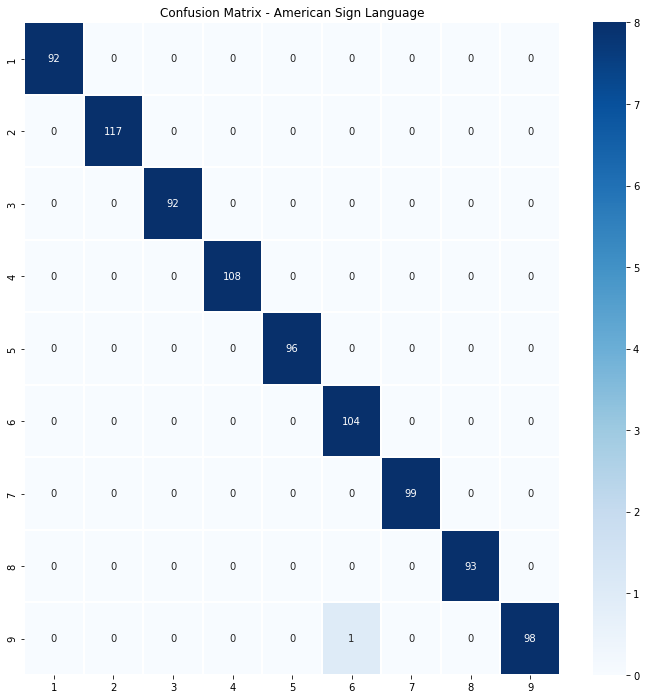

In [9]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)